# Laptop Price Prediction System with Random Forest Regressor

## 1. Data Exploration

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [2]:
# Loading the Dataset 
df = pd.read_csv('laptop_price.csv' , encoding = 'latin-1')

In [3]:
# Printing the first 5 rows of the Dataset
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
# Printing the last 5 rows of the Dataset
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [5]:
# (Rows and Columns) of the Dataset
df.shape

(1303, 13)

In [6]:
# Priniting the Information about the Dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
# Statistical Measure of the Data
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [8]:
# Checking for Missing/Empty Values
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [9]:
# Checking for Duplicate Values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1303, dtype: bool

### 2. Data Visualization

In [10]:
# Printing the Distribution of Company Column
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

<Axes: xlabel='Company'>

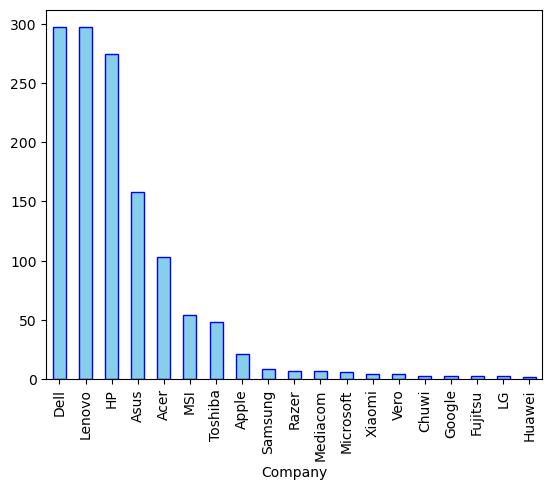

In [11]:
# Distribution of the Company Column in the form of a Histogram 
df['Company'].value_counts().plot(kind ='bar', color ='skyblue', edgecolor = 'blue')

In [12]:
# Printing the Distribution of TypeName Column
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

<Axes: ylabel='count'>

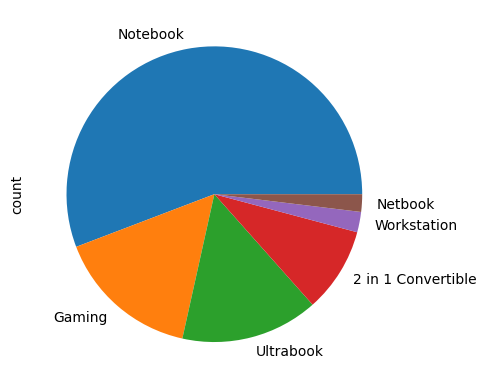

In [13]:
# Distribution of the TypeName Column in the form of a Pie Chart 
df['TypeName'].value_counts().plot(kind='pie')

In [14]:
# Printing the Distribution of Inches Column
df['Inches'].value_counts()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

<Axes: xlabel='Inches'>

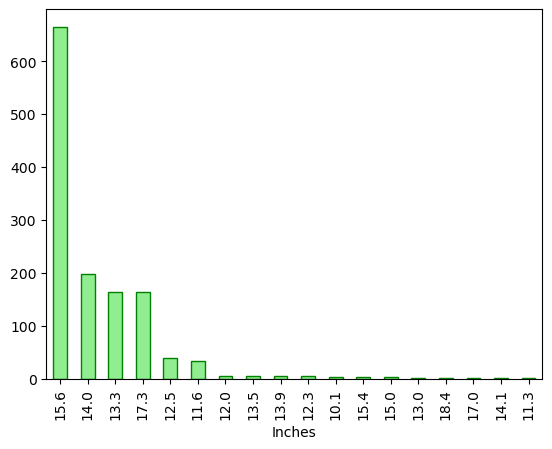

In [15]:
# Distribution of the Inches Column in the form of a Histogram 
df['Inches'].value_counts().plot(kind='bar', color = 'lightgreen', edgecolor = 'green')

In [16]:
# Printing the Distribution of Inches Column
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

<Axes: ylabel='OpSys'>

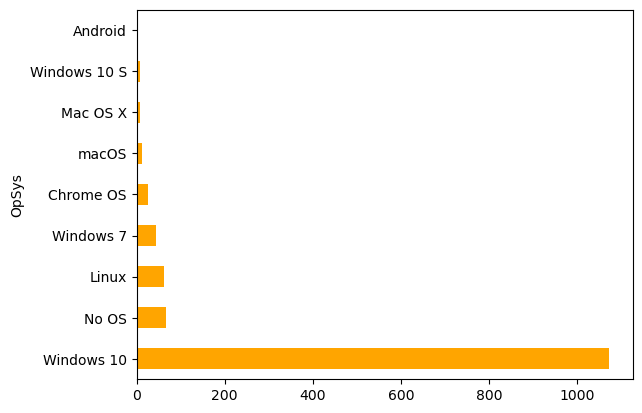

In [17]:
# Distribution of the Inches Column in the form of a Histogram 
df['OpSys'].value_counts().plot(kind ='barh', color = 'orange')

### 3. Feature Engineering

In [18]:
# Dropping the Product Column
df = df.drop('Product', axis = 1)

In [19]:
# Cross-checking it by printing the first five rows of the Data Set
df.head()

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [20]:
# Printing the Distribution of Company Column
df.Company.value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [21]:
# Using get_dummies for getting integers  as a value and then dropping the Column
df = df.join(pd.get_dummies(df.Company, dtype =int))
df = df.drop('Company', axis = 1)

In [22]:
# Cross-checking it by printing the first five rows of the Data Set
df.head()

,laptop_ID,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,1,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,0,0,0,0,0,0,0,0,0,0
1,2,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,0,0,0,0,0,0,0,0,0,0
2,3,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,0,0,0,0,0,0,0,0,0,0
3,4,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,0,0,0,0,0,0,0,0,0,0
4,5,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Using get_dummies for getting integers  as a value and then dropping the Column
df = df.join(pd.get_dummies(df.TypeName, dtype = int))
df = df.drop('TypeName', axis = 1)

In [24]:
# Cross-checking it by printing the first five rows of the Data Set
df.head()

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,1,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,0,0,0,0,0,0,0,0,1,0
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,0,0,0,0,0,0,0,0,1,0
2,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,0,0,0,0,0,0,0,1,0,0
3,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,0,0,0,0,0,0,0,0,1,0
4,5,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,0,0,0,0,0,0,0,0,1,0


In [25]:
# Using split function to seperate the numerical value in the data set
df['ScreenResolution'] = df.ScreenResolution.str.split(' ').apply(lambda x: x[-1])
df['Screen Width'] = df.ScreenResolution.str.split('x').apply(lambda x: x[0])
df['Screen Height'] = df.ScreenResolution.str.split('x').apply(lambda x:x[1])

In [26]:
# Cross-checking it by printing the first five rows of the Data Set
df.head()

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height
0,1,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,0,0,0,0,0,0,1,0,2560,1600
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,0,0,0,0,0,0,1,0,1440,900
2,3,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,0,0,0,0,0,1,0,0,1920,1080
3,4,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,0,0,0,0,0,0,1,0,2880,1800
4,5,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,0,0,0,0,0,0,1,0,2560,1600


In [27]:
# Dropping the ScreenResolution Column
df = df.drop('ScreenResolution', axis =1)

In [28]:
# Using split function to seperate the numerical value in the data set
df['CPU Brand'] = df.Cpu.str.split(' ').apply(lambda x: x[0])

In [29]:
# Using split function to seperate the numerical value in the data set
df['CPU Frequency'] = df.Cpu.str.split(' ').apply(lambda x: x[-1])

In [30]:
# Dropping the Cpu Column
df = df.drop('Cpu', axis =1)

In [31]:
# Cross-checking it by printing the first five rows of the Data Set
df.head()

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand,CPU Frequency
0,1,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3GHz
1,2,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,...,0,0,0,0,1,0,1440,900,Intel,1.8GHz
2,3,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5GHz
3,4,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,...,0,0,0,0,1,0,2880,1800,Intel,2.7GHz
4,5,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,...,0,0,0,0,1,0,2560,1600,Intel,3.1GHz


In [32]:
# Using the string function to remove the values in the dataset
df['CPU Frequency'] = df['CPU Frequency'].str[:-3]

In [33]:
# Using the string function to remove the values in the dataset
df['Ram'] = df['Ram'].str[:-2]

In [34]:
# Converting the type of the data to integer or float
df['Ram'] = df['Ram'].astype('int')
df['Inches'] = df['Inches'].astype('int')
df['CPU Frequency'] = df['CPU Frequency'].astype('float64')
df['Screen Width'] = df['Screen Width'].astype('int')
df['Screen Height'] = df['Screen Height'].astype('int')

In [35]:
# Cross-Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   laptop_ID           1303 non-null   int64  
 1   Inches              1303 non-null   int64  
 2   Ram                 1303 non-null   int64  
 3   Memory              1303 non-null   object 
 4   Gpu                 1303 non-null   object 
 5   OpSys               1303 non-null   object 
 6   Weight              1303 non-null   object 
 7   Price_euros         1303 non-null   float64
 8   Acer                1303 non-null   int64  
 9   Apple               1303 non-null   int64  
 10  Asus                1303 non-null   int64  
 11  Chuwi               1303 non-null   int64  
 12  Dell                1303 non-null   int64  
 13  Fujitsu             1303 non-null   int64  
 14  Google              1303 non-null   int64  
 15  HP                  1303 non-null   int64  
 16  Huawei

In [36]:
# Using split function to seperate the numerical value in the data set
df['Memory Amount'] = df.Memory.str.split(' ').apply(lambda x: x[0])

In [37]:
# Using split function to seperate the numerical value in the data set
df['Memory Type'] = df.Memory.str.split(' ').apply(lambda x: x[1])

In [38]:
# Defining a function to convert the GB value to MB
def turn_memory_into_MB(value):
    if 'GB' in value:
        return float(value[:value.find('GB')]) * 1000
    elif 'TB' in value:
        return float(value[:value.find('TB')]) * 1000000

In [39]:
df['Memory Amount'] = df['Memory Amount'].apply(turn_memory_into_MB)

In [40]:
# Dropping the Memory Column
df = df.drop('Memory', axis = 1)

In [41]:
# Using the string function to remove the values in the dataset
df['Weight'] = df['Weight'].str[:-2]

In [42]:
# Converting the type of the data to integer or float
df['Weight'] = df['Weight'].astype('float64')

In [43]:
# Cross Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   laptop_ID           1303 non-null   int64  
 1   Inches              1303 non-null   int64  
 2   Ram                 1303 non-null   int64  
 3   Gpu                 1303 non-null   object 
 4   OpSys               1303 non-null   object 
 5   Weight              1303 non-null   float64
 6   Price_euros         1303 non-null   float64
 7   Acer                1303 non-null   int64  
 8   Apple               1303 non-null   int64  
 9   Asus                1303 non-null   int64  
 10  Chuwi               1303 non-null   int64  
 11  Dell                1303 non-null   int64  
 12  Fujitsu             1303 non-null   int64  
 13  Google              1303 non-null   int64  
 14  HP                  1303 non-null   int64  
 15  Huawei              1303 non-null   int64  
 16  LG    

In [44]:
# Using split function to seperate the numerical value in the data set
df['GPU Brand'] = df.Gpu.str.split(' ').apply(lambda x: x[0])
df = df.drop('Gpu', axis = 1)

In [45]:
# Using split function to seperate the numerical value in the data set
df = df.join(pd.get_dummies(df.OpSys, dtype = int))
df = df.drop('OpSys', axis = 1)

In [46]:
cpu_categories = pd.get_dummies(df['CPU Brand'], dtype = int)
cpu_categories.columns = [col + '_CPU' for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop('CPU Brand', axis = 1)

In [47]:
gpu_categories = pd.get_dummies(df['GPU Brand'], dtype = int)
gpu_categories.columns = [col + '_GPU' for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop('GPU Brand', axis = 1)

In [48]:
df = df.join(pd.get_dummies(df['Memory Type'], dtype = int, prefix = 'memorytype'))
df = df.drop('Memory Type', axis = 1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   laptop_ID           1303 non-null   int64  
 1   Inches              1303 non-null   int64  
 2   Ram                 1303 non-null   int64  
 3   Weight              1303 non-null   float64
 4   Price_euros         1303 non-null   float64
 5   Acer                1303 non-null   int64  
 6   Apple               1303 non-null   int64  
 7   Asus                1303 non-null   int64  
 8   Chuwi               1303 non-null   int64  
 9   Dell                1303 non-null   int64  
 10  Fujitsu             1303 non-null   int64  
 11  Google              1303 non-null   int64  
 12  HP                  1303 non-null   int64  
 13  Huawei              1303 non-null   int64  
 14  LG                  1303 non-null   int64  
 15  Lenovo              1303 non-null   int64  
 16  MSI   

### 4. Model Building

In [50]:
# Correlation of the features
correlation = df.corr()

In [51]:
# Printing the correlation
correlation

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU,memorytype_Flash,memorytype_HDD,memorytype_Hybrid,memorytype_SSD
laptop_ID,1.000000,-0.087285,-0.028607,-0.011798,0.067830,-0.057721,-0.119585,-0.044252,-0.043348,-0.013628,...,0.049765,0.039920,-0.089050,0.039920,0.094479,-0.037596,0.028792,0.050182,0.098241,-0.079509
Inches,-0.087285,1.000000,0.260826,0.820883,0.110035,-0.002777,-0.148625,0.117903,-0.020822,0.025461,...,-0.110618,-0.052353,0.184221,-0.052353,-0.574209,0.484134,-0.356533,0.234005,0.019487,-0.051481
Ram,-0.028607,0.260826,1.000000,0.383874,0.743007,-0.138432,0.023950,0.088634,-0.035117,0.082241,...,0.107051,-0.023894,-0.093119,-0.023894,-0.319551,0.415464,-0.192327,-0.318614,-0.016994,0.398663
Weight,-0.011798,0.820883,0.383874,1.000000,0.210370,0.056444,-0.138191,0.101332,-0.022536,0.088465,...,-0.057386,-0.037026,0.106519,-0.037026,-0.596378,0.565232,-0.259337,0.166644,0.030970,-0.037134
Price_euros,0.067830,0.110035,0.743007,0.210370,1.000000,-0.208349,0.080688,-0.010376,-0.055646,0.048509,...,0.181127,-0.018431,-0.199415,-0.018431,-0.184205,0.348797,-0.210823,-0.426121,-0.039386,0.513609
Acer,-0.057721,-0.002777,-0.138432,0.056444,-0.208349,1.000000,-0.037497,-0.108831,-0.014074,-0.159187,...,-0.066566,-0.008119,-0.034859,-0.008119,0.005305,0.020848,0.086359,0.109048,-0.025765,-0.140685
Apple,-0.119585,-0.148625,0.023950,-0.138191,0.080688,-0.037497,1.000000,-0.047544,-0.006148,-0.069542,...,0.028849,-0.003547,0.001749,-0.003547,0.078028,-0.085183,0.230044,-0.081359,-0.011256,-0.032982
Asus,-0.044252,0.117903,0.088634,0.101332,-0.010376,-0.108831,-0.047544,1.000000,-0.017845,-0.201839,...,-0.036835,-0.010295,-0.073770,-0.010295,-0.106654,0.170742,0.049519,-0.007644,-0.032668,-0.010926
Chuwi,-0.043348,-0.020822,-0.035117,-0.022536,-0.055646,-0.014074,-0.006148,-0.017845,1.000000,-0.026102,...,0.010828,-0.001331,-0.019232,-0.001331,0.043093,-0.031972,0.194383,-0.030537,-0.004225,-0.065032
Dell,-0.013628,0.025461,0.082241,0.088465,0.048509,-0.159187,-0.069542,-0.201839,-0.026102,1.000000,...,0.122473,-0.015058,0.190722,-0.015058,-0.075707,-0.060187,-0.118570,0.046568,-0.005856,0.014739


<Axes: >

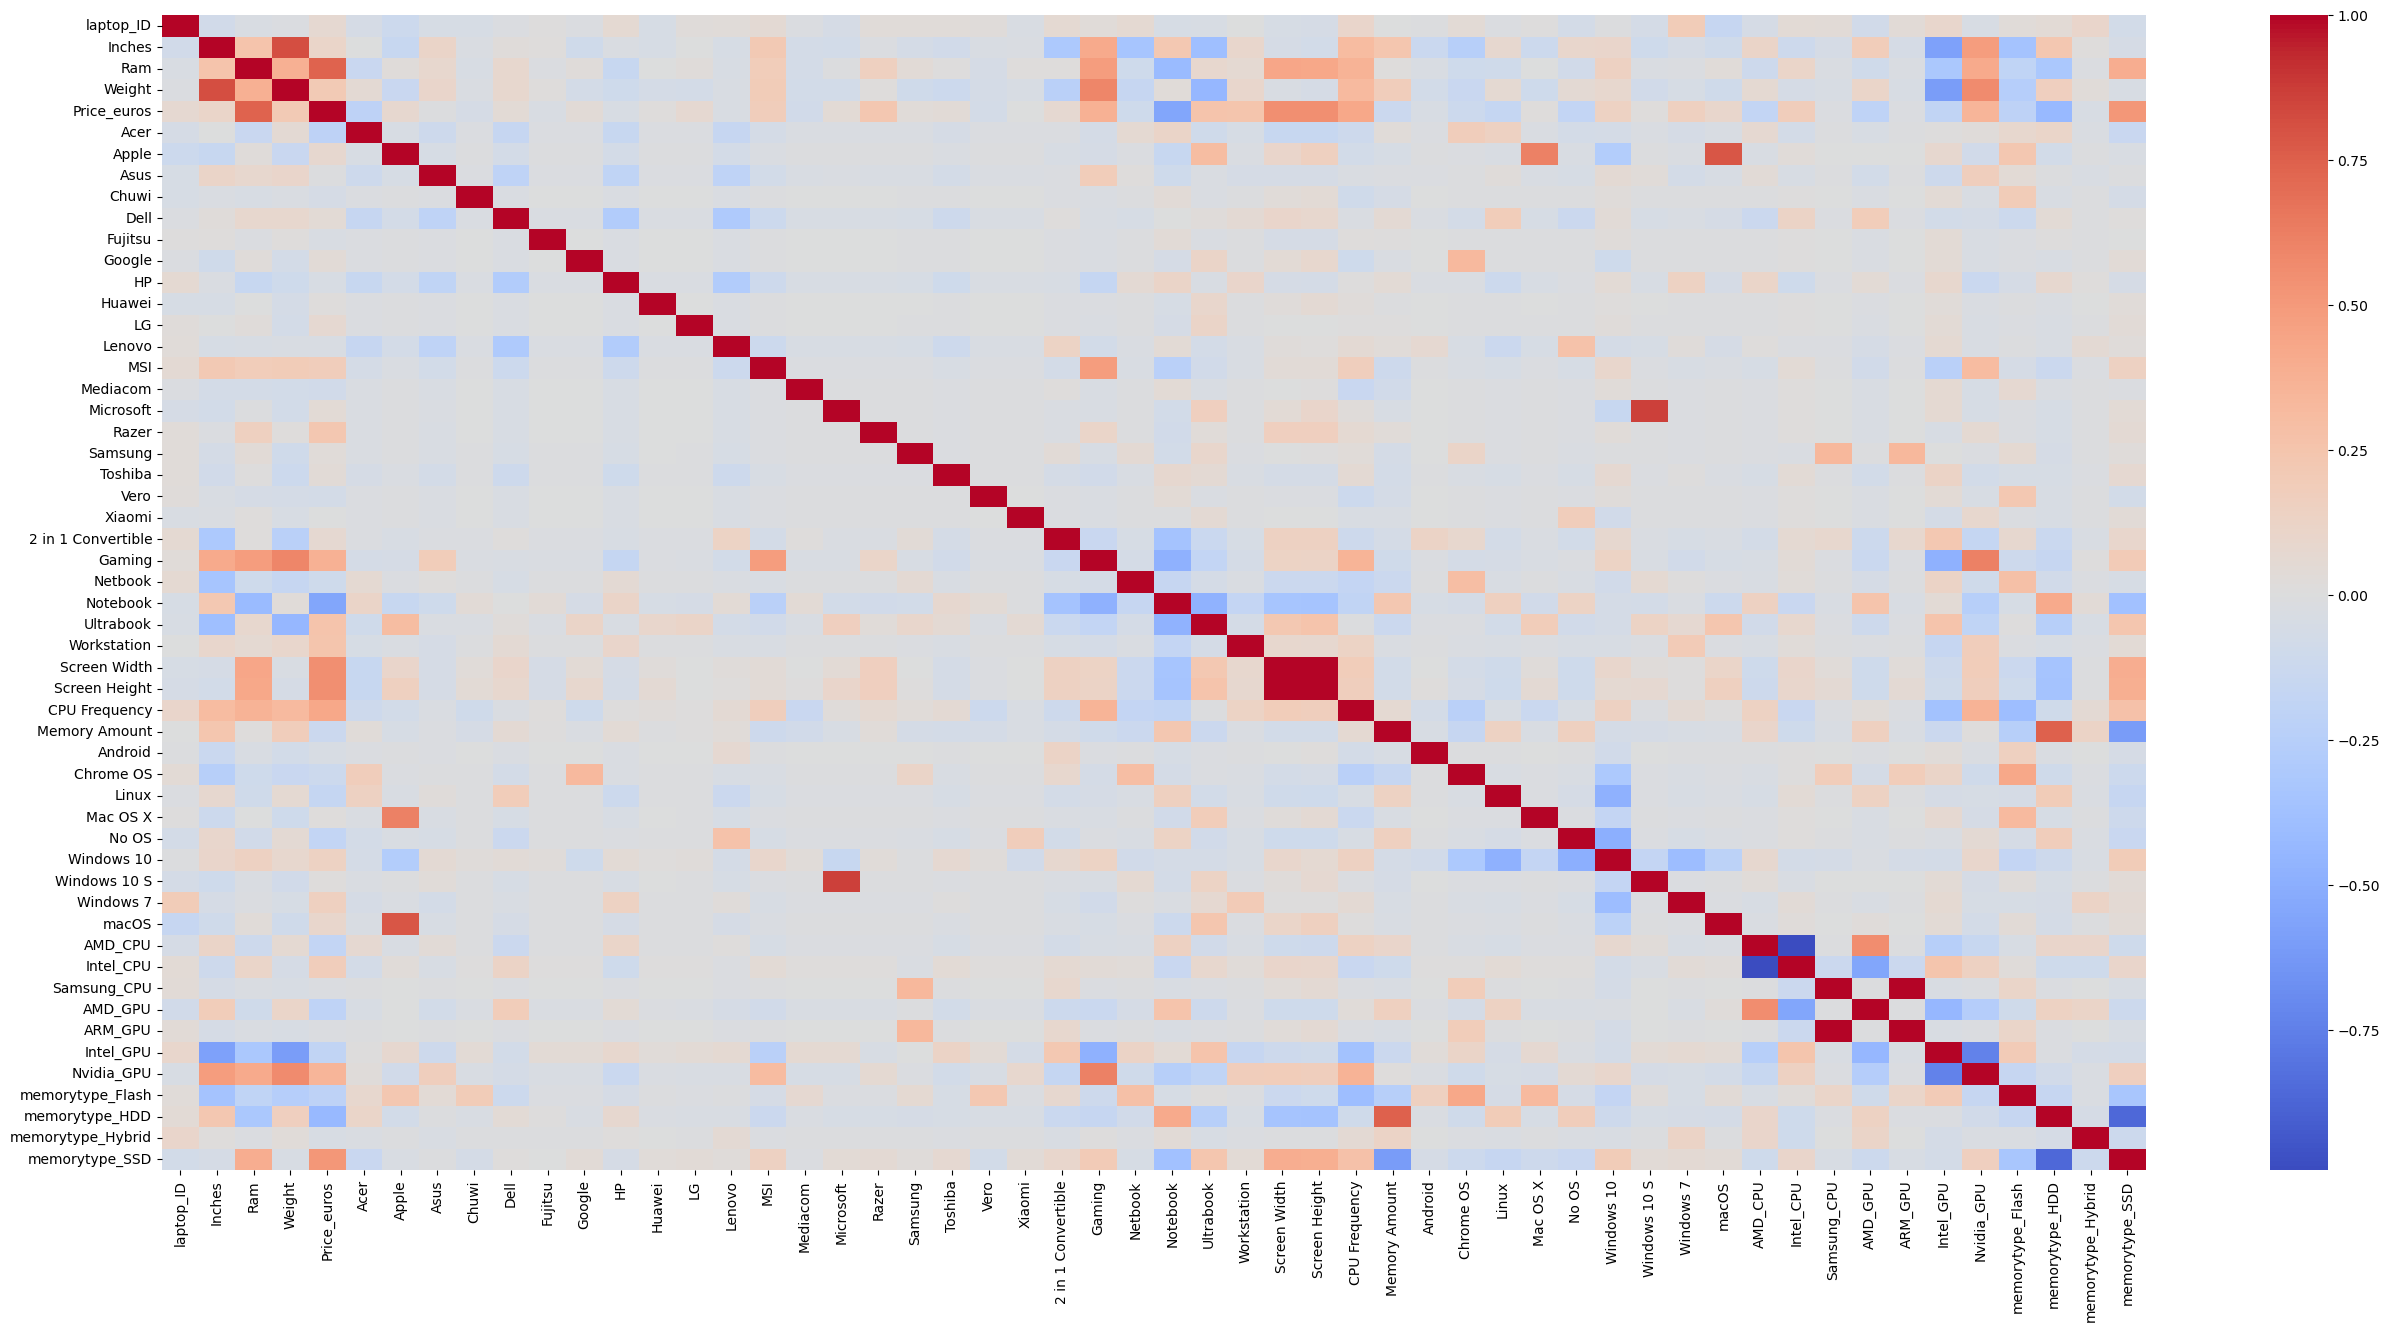

In [52]:
# Building a Heatmap
plt.figure(figsize=(32,15))
sns.heatmap(correlation,cmap = 'coolwarm')

In [53]:
# Parameters which have a correlation with Price Column
target_correlations = df.corr()['Price_euros'].apply(abs).sort_values()

In [54]:
target_correlations

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_GPU               0.018431
Samsung_CPU           0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
memorytype_Hybrid     0.039386
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
laptop_ID             0.067830
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Inches                0.110035
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS   

In [55]:
# 25 Features from the dataset for the Model Building
selected_features = target_correlations[-26:].index

In [56]:
selected_features = list(selected_features)

In [57]:
selected_features

['Memory Amount',
 'Windows 10',
 'Windows 7',
 'Linux',
 'No OS',
 'MSI',
 'AMD_CPU',
 'Intel_CPU',
 'Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'memorytype_Flash',
 'Razer',
 'Workstation',
 'Ultrabook',
 'Nvidia_GPU',
 'Gaming',
 'memorytype_HDD',
 'CPU Frequency',
 'memorytype_SSD',
 'Notebook',
 'Screen Height',
 'Screen Width',
 'Ram',
 'Price_euros']

In [58]:
limited_df = df[selected_features]

In [59]:
limited_df

,Memory Amount,Windows 10,Windows 7,Linux,No OS,MSI,AMD_CPU,Intel_CPU,Intel_GPU,AMD_GPU,...,Nvidia_GPU,Gaming,memorytype_HDD,CPU Frequency,memorytype_SSD,Notebook,Screen Height,Screen Width,Ram,Price_euros
0,128000.0,0,0,0,0,0,0,1,1,0,...,0,0,0,2.3,1,0,1600,2560,8,1339.69
1,128000.0,0,0,0,0,0,0,1,1,0,...,0,0,0,1.8,0,0,900,1440,8,898.94
2,256000.0,0,0,0,1,0,0,1,1,0,...,0,0,0,2.5,1,1,1080,1920,8,575.00
3,512000.0,0,0,0,0,0,0,1,0,1,...,0,0,0,2.7,1,0,1800,2880,16,2537.45
4,256000.0,0,0,0,0,0,0,1,1,0,...,0,0,0,3.1,1,0,1600,2560,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,128000.0,1,0,0,0,0,0,1,1,0,...,0,0,0,2.5,1,0,1080,1920,4,638.00
1299,512000.0,1,0,0,0,0,0,1,1,0,...,0,0,0,2.5,1,0,1800,3200,16,1499.00
1300,64000.0,1,0,0,0,0,0,1,1,0,...,0,0,0,1.6,0,1,768,1366,2,229.00
1301,1000000.0,1,0,0,0,0,0,1,0,1,...,0,0,1,2.5,0,1,768,1366,6,764.00


<Axes: >

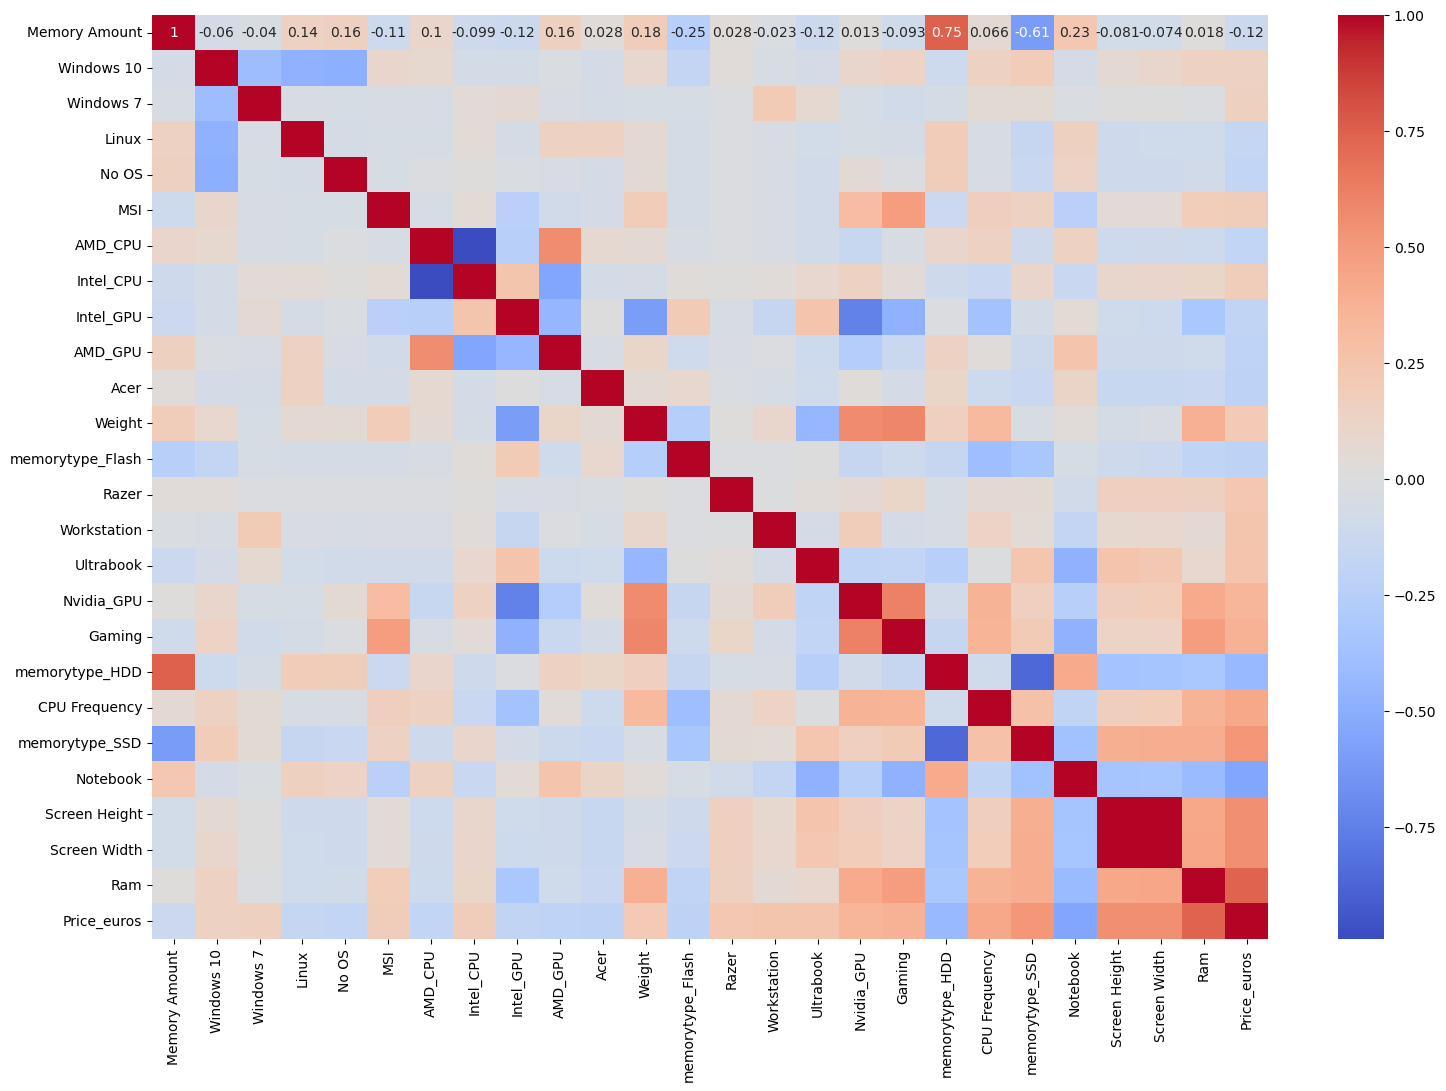

In [60]:
# Heatmap of the Limited Dataframe
plt.figure(figsize=(18,12))
sns.heatmap(limited_df.corr(), annot = True, cmap = 'coolwarm')

In [61]:
# Dropping Price Column
X = limited_df.drop('Price_euros', axis = 1)
y = limited_df['Price_euros']

In [62]:
# Splitting the data into training data and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.12, random_state = 42)

In [63]:
# Standardizing the values in the dataset
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

In [64]:
# Fitting the model
forest = RandomForestRegressor()
forest.fit(X_scaled_train, y_train)

RandomForestRegressor()

In [65]:
# Accuracy score of the model on the testing data
forest.score(X_scaled_test, y_test)

0.8223773307944047

In [66]:
# Accuracy score of the model on the training data
forest.score(X_scaled_train,y_train)

0.9700471994443084

In [67]:
y_pred = forest.predict(X_scaled_test)

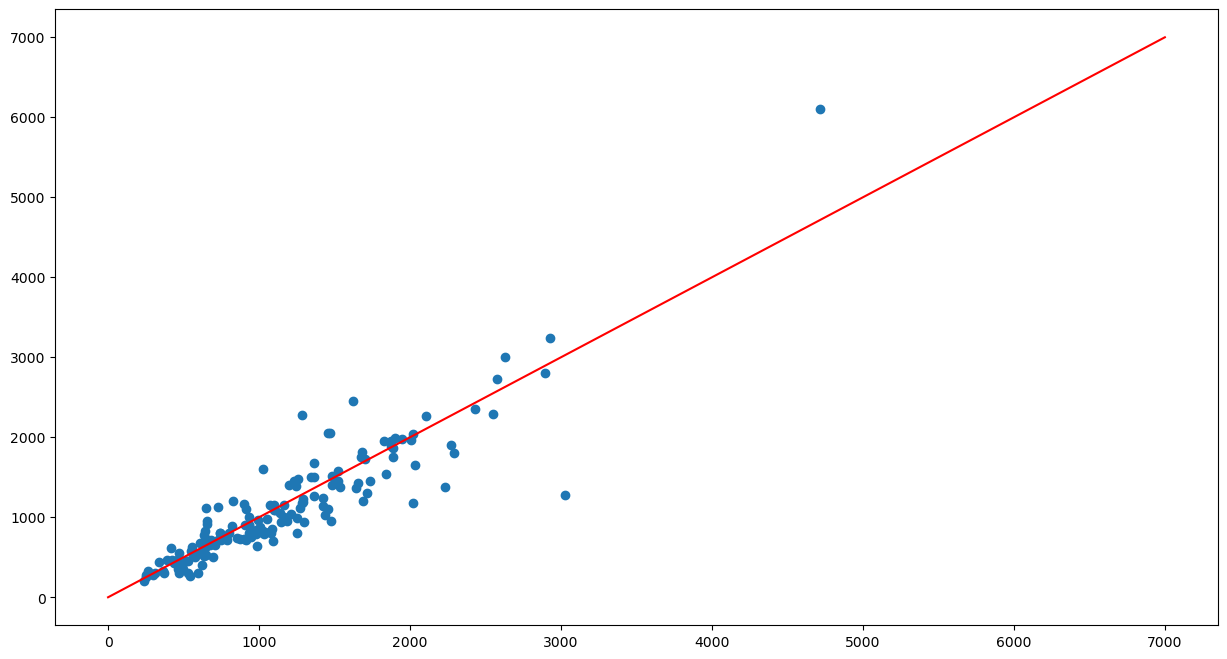

In [68]:
# Building a Scatter plot
plt.figure(figsize=(15,8))
plt.scatter(y_pred, y_test)
plt.plot(range(0,7000), range(0,7000), color = 'red')

In [69]:
X_test.iloc[0]

Memory Amount       256000.00
Windows 10               1.00
Windows 7                0.00
Linux                    0.00
No OS                    0.00
MSI                      0.00
AMD_CPU                  0.00
Intel_CPU                1.00
Intel_GPU                1.00
AMD_GPU                  0.00
Acer                     0.00
Weight                   1.05
memorytype_Flash         0.00
Razer                    0.00
Workstation              0.00
Ultrabook                0.00
Nvidia_GPU               0.00
Gaming                   0.00
memorytype_HDD           0.00
CPU Frequency            2.50
memorytype_SSD           1.00
Notebook                 1.00
Screen Height         1080.00
Screen Width          1920.00
Ram                      8.00
Name: 479, dtype: float64

In [70]:
X_new_scaled = scaler.transform([X_test.iloc[15]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:
forest.predict(X_new_scaled)

array([904.083])

In [72]:
y_test.iloc[15]

899.0